In [29]:
from pandas import DataFrame
from numpy import exp 
from matplotlib.pyplot import savefig
from random import random , shuffle
from time import time
from copy import deepcopy
from functools import reduce

In [30]:
class Cut : 
  # constructor
  def __init__( self , order , standard_size , wps = None , linear_order = False ) :
    if linear_order :
      self.put_in_pack( order , standard_size )
    else :
      self.__order = order 
    self.__standard_size = standard_size
    if wps is not None : 
      self.__wps = wps
    else :
      self.__wps = [ self.__standard_size - sum ( stock ) for stock in self.__order ]
    self.__cost = len( self.__order )

  def put_in_pack( self , order , standard_size ) :
    self.__order = []
    remaining = 0
    for i in order :
      if remaining >= i :
        self.__order[-1].append( i )
        remaining -= i
      else :
        self.__order.append( [ i ] )
        remaining = standard_size - i 
    
    
  # getters
  @property 
  def cost ( self ) :
    return self.__cost
  
  def __str__( self ) :
    return str( self.__order )

  # operator overloading  
  def __lt__ ( self , other ) :
    return self.cost > other.cost
  def __eq__ ( self , other ) :
    return self.cost == other.cost
  def __le__ ( self , other ) :
    return self.cost >= other.cost
  def __ge__ ( self , other ) :
    return self.cost <= other.cost
  def __gt__ ( self , other ) :
    return self.cost < other.cost

  @property
  def neighbours ( self ) :
    tmp = list(deepcopy(self.__order))
    wps = self.__wps
    for i in range( len( tmp ) ) :
      remaining = []
      assigned_to = []
      for j in range( len( tmp[i] ) ) :
        for k in range( len(tmp) ) :
          if i != k and tmp[i][j] <= wps[k] :
            tmp[k].append( tmp[i][j] )
            assigned_to.append( k )
            wps[k] -= tmp[i][j]
            wps[i] += tmp[i][j]
            break
        else :
          remaining.append( tmp[i][j] )
      if len( remaining ) > 0 :
        if len( assigned_to ) == 0 :
          remaining = []
          continue
        tmp[i] = remaining
        yield Cut( tmp , self.__standard_size , wps = wps , linear_order = False )
        remaining = []
      else :
        tmp.pop(i)
        wps.pop(i)
        yield Cut( tmp , self.__standard_size , wps = wps , linear_order = False )
        tmp.insert(i,[])
        wps.insert(i,self.__standard_size)
      for k in assigned_to :
        tmp[i].append(tmp[k].pop())
        wps[k] += tmp[i][-1]
        wps[i] -= tmp[i][-1]

In [31]:
# simulated annealing algorithm
def simulated_annealing ( initial_temp , temp_length , initial_cooling_rate , initial_solutions , cooling_rate_step , temp_length_step ) :
  cooling_rate = initial_cooling_rate
  temp = initial_temp
  runing = True
  cur_solutions = initial_solutions
  best = max( initial_solutions )
  costs = [ best.cost ] 
  print( "initial best cost is" , best.cost)
  n = 0
  while runing :
    new_solutions = []
    for solution in cur_solutions :
      new_solution , better_neighbour = solution , False
      for neighbour in solution.neighbours :
        if neighbour > new_solution :
          new_solution , better_neighbour = neighbour , True
        elif (not better_neighbour) and random() < exp( ( new_solution.cost - neighbour.cost ) / temp ) :
          new_solution = neighbour
      new_solutions.append( new_solution )
    cur_solutions  = tuple(new_solutions)
    new_best = max( cur_solutions )
    costs.append( new_best.cost )
    if new_best.cost == best.cost :
        if temp < 1 :
          runing = False
    elif new_best > best :
      best , n = new_best , 0
    n += 1
    if n >= temp_length :
      temp , cooling_rate , temp_length , n = temp * cooling_rate , cooling_rate * cooling_rate_step , temp_length * temp_length_step , 0
    print( "best cost is" , new_best.cost)
    print( "temp is" , temp)
  return DataFrame( costs ), best

In [32]:
def create_initial_solutions ( requests , standard_size ,n = None ) :
  if n is None :
    n = len(requests)
  solutions = [ deepcopy(requests) for _ in range(n)]
  for i in solutions :
    shuffle(i)
  return tuple (Cut( i , standard_size , linear_order = True ) for i in solutions)

initial best cost is 63
best cost is 62
temp is 700
best cost is 62
temp is 700
best cost is 62
temp is 700
best cost is 62
temp is 700
best cost is 62
temp is 700
best cost is 62
temp is 700
best cost is 62
temp is 700
best cost is 62
temp is 700
best cost is 62
temp is 700
best cost is 62
temp is 700
best cost is 62
temp is 700
best cost is 62
temp is 700
best cost is 62
temp is 700
best cost is 62
temp is 700
best cost is 62
temp is 700
best cost is 62
temp is 700
best cost is 62
temp is 700
best cost is 62
temp is 700
best cost is 62
temp is 700
best cost is 62
temp is 700
best cost is 62
temp is 700
best cost is 62
temp is 700
best cost is 62
temp is 700
best cost is 62
temp is 700
best cost is 62
temp is 700
best cost is 62
temp is 700
best cost is 62
temp is 700
best cost is 62
temp is 700
best cost is 62
temp is 700
best cost is 62
temp is 700
best cost is 62
temp is 700
best cost is 62
temp is 700
best cost is 62
temp is 700
best cost is 62
temp is 700
best cost is 62
temp is 

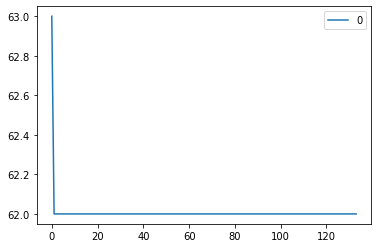

In [33]:
t1 = time()
requests = list(map(int ,open("input1.csv").read().split(",")))
stockLength = 1000
solutions , best = simulated_annealing( initial_temp = 5 * len(requests) , temp_length = len(requests)//2 , initial_cooling_rate = 0.5 , initial_solutions = create_initial_solutions( requests , stockLength , len( requests ) // 50 ) , cooling_rate_step = 0.5 , temp_length_step = 0.5 )
print("time(m) =", (time() - t1)/60 )
print(best)
print("cost=", best.cost)
solutions.plot()
savefig("1.png" , dpi = 300 )